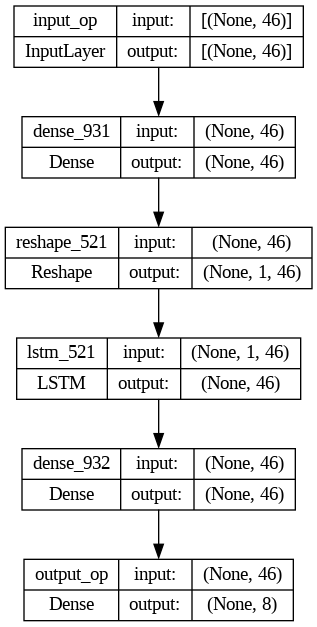

In [57]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Reshape, Input
from tensorflow.keras.utils import plot_model
from IPython.display import Image

def display_network(model, file_name='model.png'):
    plot_model(model, to_file=file_name, show_shapes=True, show_layer_names=True)
    return Image(filename=file_name)


def create_random_network1(n, m):
    model = Sequential()

    # Input layer with n neurons and named operation
    input_layer = Input(shape=(n,), name="input_op")
    model.add(input_layer)
    model.add(Dense(n, activation='sigmoid'))
    model.add(Dense(n, activation='sigmoid'))

    
    # Output layer with m neurons and named operation
    output_layer = Dense(m, activation='softmax', name="output_op")
    model.add(output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model




def create_random_network2(n, m, time_steps=1):
    model = Sequential()

    # Input layer with n neurons and named operation
    input_layer = Input(shape=(n,), name="input_op")
    model.add(input_layer)
    #model.add(Dense(n, activation='sigmoid'))
    model.add(Dense(n, activation='relu'))

    
    # Reshape the input to be compatible with LSTM layer
    model.add(Reshape((time_steps, n)))
    # LSTM layer to maintain state and learn the map
    model.add(LSTM(n))
    model.add(Dense(n, activation='relu'))
    
    
    # Output layer with m neurons and named operation
    output_layer = Dense(m, activation='softmax', name="output_op")
    model.add(output_layer)

    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return model




# Example usage
n = 46  # Number of input neurons
m = 8   # Number of output neurons
time_steps = 1  # Number of time steps


for i in range(0):
    model = create_random_network2(n, m)
    model.save("Agents/agent_model_" + str(i))

model = create_random_network2(n, m)
display_network(model)